# looks at spectral diffusion and compares between 

1) lambda selection via cross validation on a voxel-wise bases
2) lambda = 0.1
3) lambda = 2
4) lambda = 8

Compares corresponding flow and corresponding number of peaks fit!

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

def func(x,m,b):
    return m*x + b

# 2-peak, lambda = 0.1

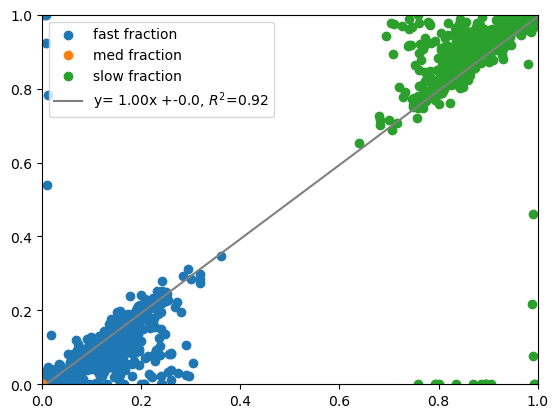

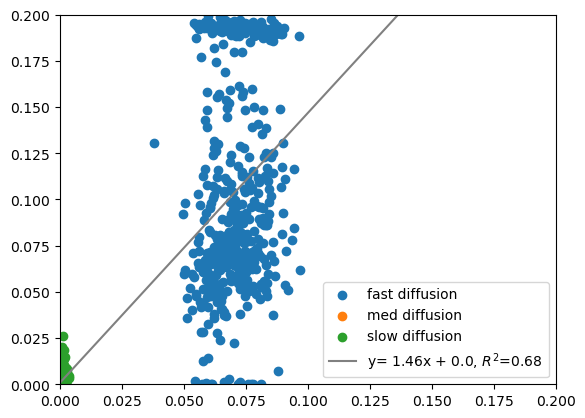

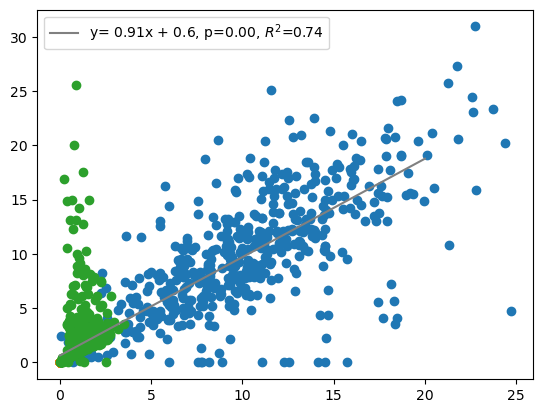

SignificanceResult(statistic=0.9247200796269313, pvalue=0.0)
fast fD difference = -0.15661 ± 4.05586, 23.27593%, 51.78347%
med fD difference = 0.00000 ± 0.00000, nan%, nan%
slow fD difference = 1.02569 ± 2.79767, 11.36029%, 137.33171%
All fD difference = 0.28969 ± 2.89262, 17.73590%, 94.55759%


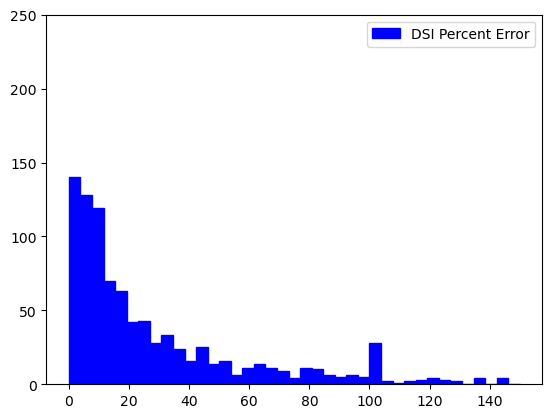

number of peaks = 1.95200 ±  0.29949
2    487
0     11
1      2
Name: Fit number of peaks, dtype: int64
unsorted:
3    336
2    151
0     11
1      2
Name: number of peaks, dtype: int64


In [49]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth = Truth.fillna(0)
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})


## this is with every single one fit individually with a different lambda
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_lambdas.xlsx'
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_0.1_sorted') 
AveragedDataFits=AveragedDataFits.rename(columns={c: 'Fit '+c for c in AveragedDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, AveragedDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData = df_AveragedData.fillna(0)

pl.scatter(df_AveragedData['true fast fraction'],df_AveragedData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true med fraction'],df_AveragedData['Fit med fraction'], label = 'med fraction')

pl.scatter(df_AveragedData['true slow fraction'],df_AveragedData['Fit slow fraction'], label = 'slow fraction')
pl.xlim(0,1)
pl.ylim(0,1)


AllTruef = np.array(list(df_AveragedData['true fast fraction'])+list(df_AveragedData['true med fraction'])+list(df_AveragedData['true slow fraction']))
allFitf = np.array(list(df_AveragedData['Fit fast fraction'])+list(df_AveragedData['Fit med fraction'])+list(df_AveragedData['Fit slow fraction']))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruef,allFitf)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()

pl.scatter(df_AveragedData['true fast diffusion'],df_AveragedData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true med diffusion'],df_AveragedData['Fit med diffusion']/1000, label = 'med diffusion')

pl.scatter(df_AveragedData['true slow diffusion'],df_AveragedData['Fit slow diffusion']/1000, label = 'slow diffusion')
pl.xlim(0,.2)
pl.ylim(0,.2)

AllTrueD = np.array(list(df_AveragedData['true fast diffusion'])+list(df_AveragedData['true med diffusion'])+list(df_AveragedData['true slow diffusion']))
allFitD = np.array(list(df_AveragedData['Fit fast diffusion'])+list(df_AveragedData['Fit med diffusion'])+list(df_AveragedData['Fit slow diffusion']))/1000

x = np.linspace(0,.2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrueD,allFitD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
pl.show()

TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.2f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))

print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.nanmedian(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%, {100*np.mean(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.nanmedian(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%, {100*np.nanmean(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.nanmedian(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%, {100*np.nanmean(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%')
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.nanmedian(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%, {100*np.nanmean(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%')

pl.hist(100*np.abs((allFitfD - AllTruefD))/AllTruefD,bins = np.linspace(0,150,40),facecolor='blue',edgecolor='blue', label = 'DSI Percent Error')
pl.ylim(0,250)
pl.legend()
pl.show()



print(f'number of peaks = {np.mean(df_AveragedData["Fit number of peaks"]):.5f} ±  {np.std(df_AveragedData["Fit number of peaks"]):.5f}')
print(df_AveragedData['Fit number of peaks'].value_counts())

print('unsorted:')
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_0.1') 
print(AveragedDataFits['number of peaks'].value_counts())


# 2-peak lamba = 2

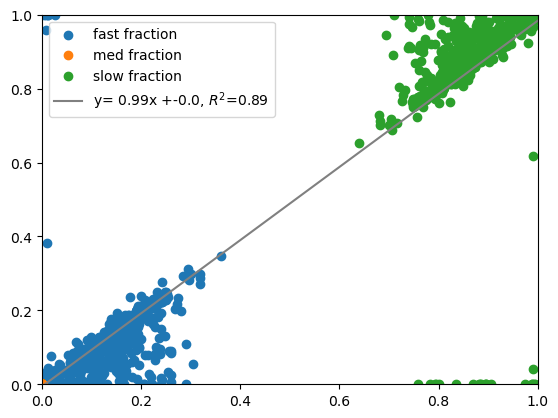

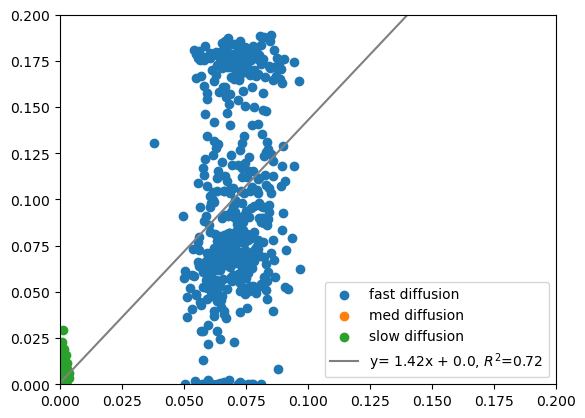

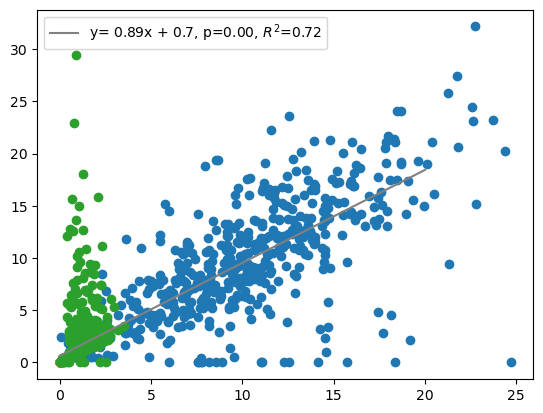

SignificanceResult(statistic=0.9163778559915423, pvalue=0.0)
fast fD difference = -0.36393 ± 4.20723, 23.07525%, 52.25238%
med fD difference = 0.00000 ± 0.00000, nan%, nan%
slow fD difference = 1.05856 ± 2.88724, 11.39349%, 121.83501%
All fD difference = 0.23154 ± 3.00716, 17.86609%, 87.04369%


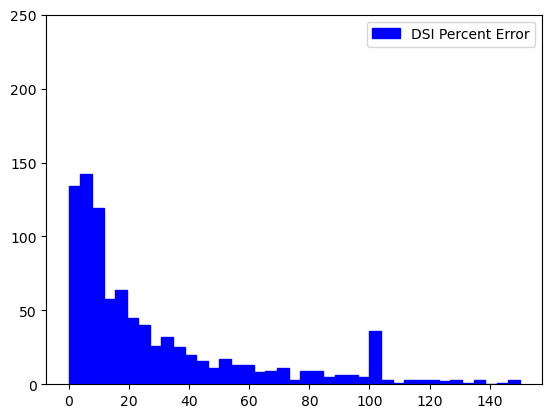

number of peaks = 1.93400 ±  0.34299
2    481
0     14
1      5
Name: Fit number of peaks, dtype: int64
unsorted:
3    295
2    186
0     14
1      5
Name: number of peaks, dtype: int64


In [50]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth = Truth.fillna(0)
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})


## this is with every single one fit individually with a different lambda
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_lambdas.xlsx'
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_2_sorted') 
AveragedDataFits=AveragedDataFits.rename(columns={c: 'Fit '+c for c in AveragedDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, AveragedDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData = df_AveragedData.fillna(0)

pl.scatter(df_AveragedData['true fast fraction'],df_AveragedData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true med fraction'],df_AveragedData['Fit med fraction'], label = 'med fraction')

pl.scatter(df_AveragedData['true slow fraction'],df_AveragedData['Fit slow fraction'], label = 'slow fraction')
pl.xlim(0,1)
pl.ylim(0,1)


AllTruef = np.array(list(df_AveragedData['true fast fraction'])+list(df_AveragedData['true med fraction'])+list(df_AveragedData['true slow fraction']))
allFitf = np.array(list(df_AveragedData['Fit fast fraction'])+list(df_AveragedData['Fit med fraction'])+list(df_AveragedData['Fit slow fraction']))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruef,allFitf)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()

pl.scatter(df_AveragedData['true fast diffusion'],df_AveragedData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true med diffusion'],df_AveragedData['Fit med diffusion']/1000, label = 'med diffusion')

pl.scatter(df_AveragedData['true slow diffusion'],df_AveragedData['Fit slow diffusion']/1000, label = 'slow diffusion')
pl.xlim(0,.2)
pl.ylim(0,.2)

AllTrueD = np.array(list(df_AveragedData['true fast diffusion'])+list(df_AveragedData['true med diffusion'])+list(df_AveragedData['true slow diffusion']))
allFitD = np.array(list(df_AveragedData['Fit fast diffusion'])+list(df_AveragedData['Fit med diffusion'])+list(df_AveragedData['Fit slow diffusion']))/1000

x = np.linspace(0,.2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrueD,allFitD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
pl.show()

TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.2f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))

print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.nanmedian(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%, {100*np.mean(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.nanmedian(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%, {100*np.nanmean(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.nanmedian(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%, {100*np.nanmean(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%')
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.nanmedian(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%, {100*np.nanmean(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%')

pl.hist(100*np.abs((allFitfD - AllTruefD))/AllTruefD,bins = np.linspace(0,150,40),facecolor='blue',edgecolor='blue', label = 'DSI Percent Error')
pl.ylim(0,250)
pl.legend()
pl.show()




print(f'number of peaks = {np.mean(df_AveragedData["Fit number of peaks"]):.5f} ±  {np.std(df_AveragedData["Fit number of peaks"]):.5f}')
print(df_AveragedData['Fit number of peaks'].value_counts())

print('unsorted:')
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_2') 
print(AveragedDataFits['number of peaks'].value_counts())


# 2-peak lambda = 8

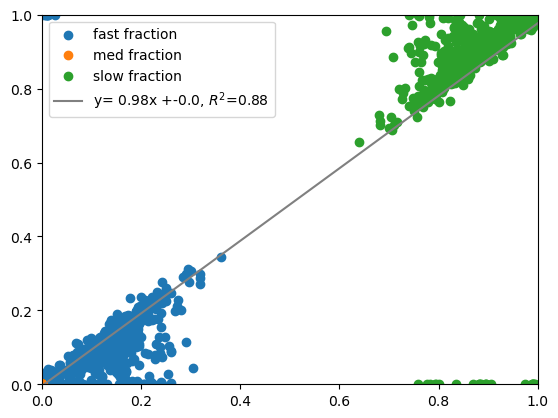

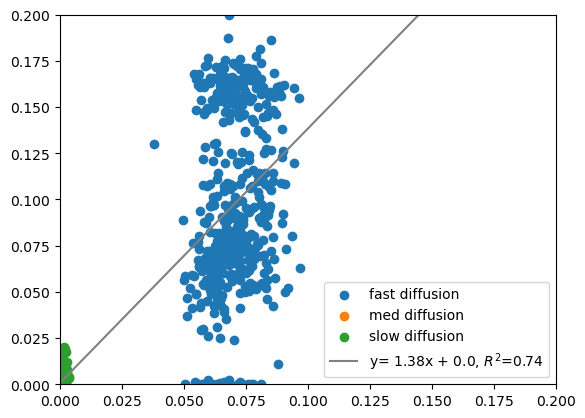

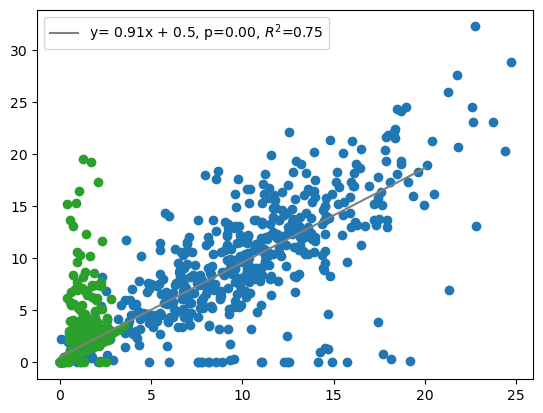

SignificanceResult(statistic=0.9138123010949496, pvalue=0.0)
fast fD difference = -0.37795 ± 4.11746, 21.98946%, 50.92593%
med fD difference = 0.00000 ± 0.00000, nan%, nan%
slow fD difference = 0.90016 ± 2.53016, 10.57142%, 104.25207%
All fD difference = 0.17407 ± 2.84121, 17.06484%, 77.58900%


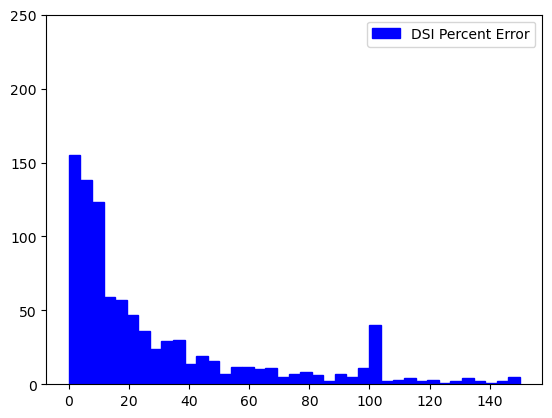

number of peaks = 1.92200 ±  0.36867
2    477
0     16
1      7
Name: Fit number of peaks, dtype: int64
unsorted:
2    254
3    223
0     16
1      7
Name: number of peaks, dtype: int64


In [51]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth = Truth.fillna(0)
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})


## this is with every single one fit individually with a different lambda
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_lambdas.xlsx'
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_8_sorted') 
AveragedDataFits=AveragedDataFits.rename(columns={c: 'Fit '+c for c in AveragedDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, AveragedDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData = df_AveragedData.fillna(0)

pl.scatter(df_AveragedData['true fast fraction'],df_AveragedData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true med fraction'],df_AveragedData['Fit med fraction'], label = 'med fraction')

pl.scatter(df_AveragedData['true slow fraction'],df_AveragedData['Fit slow fraction'], label = 'slow fraction')
pl.xlim(0,1)
pl.ylim(0,1)


AllTruef = np.array(list(df_AveragedData['true fast fraction'])+list(df_AveragedData['true med fraction'])+list(df_AveragedData['true slow fraction']))
allFitf = np.array(list(df_AveragedData['Fit fast fraction'])+list(df_AveragedData['Fit med fraction'])+list(df_AveragedData['Fit slow fraction']))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruef,allFitf)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()

pl.scatter(df_AveragedData['true fast diffusion'],df_AveragedData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true med diffusion'],df_AveragedData['Fit med diffusion']/1000, label = 'med diffusion')

pl.scatter(df_AveragedData['true slow diffusion'],df_AveragedData['Fit slow diffusion']/1000, label = 'slow diffusion')
pl.xlim(0,.2)
pl.ylim(0,.2)

AllTrueD = np.array(list(df_AveragedData['true fast diffusion'])+list(df_AveragedData['true med diffusion'])+list(df_AveragedData['true slow diffusion']))
allFitD = np.array(list(df_AveragedData['Fit fast diffusion'])+list(df_AveragedData['Fit med diffusion'])+list(df_AveragedData['Fit slow diffusion']))/1000

x = np.linspace(0,.2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrueD,allFitD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
pl.show()

TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.2f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))

print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.nanmedian(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%, {100*np.mean(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.nanmedian(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%, {100*np.nanmean(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.nanmedian(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%, {100*np.nanmean(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%')
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.nanmedian(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%, {100*np.nanmean(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%')

pl.hist(100*np.abs((allFitfD - AllTruefD))/AllTruefD,bins = np.linspace(0,150,40),facecolor='blue',edgecolor='blue', label = 'DSI Percent Error')
pl.ylim(0,250)
pl.legend()
pl.show()



print(f'number of peaks = {np.mean(df_AveragedData["Fit number of peaks"]):.5f} ±  {np.std(df_AveragedData["Fit number of peaks"]):.5f}')
print(df_AveragedData['Fit number of peaks'].value_counts())

print('unsorted:')
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_8') 
print(AveragedDataFits['number of peaks'].value_counts())


# 2-peak with cross validated lambda

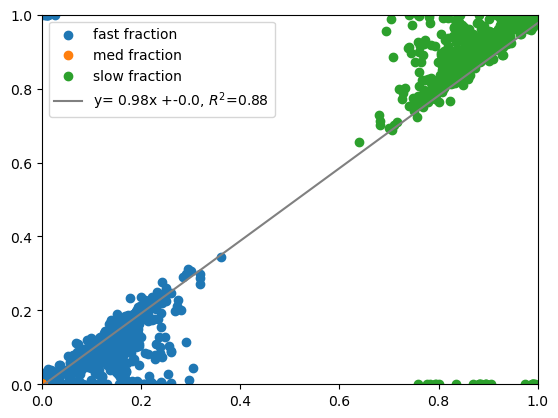

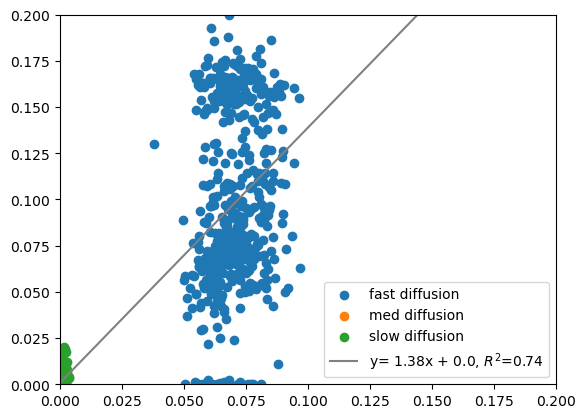

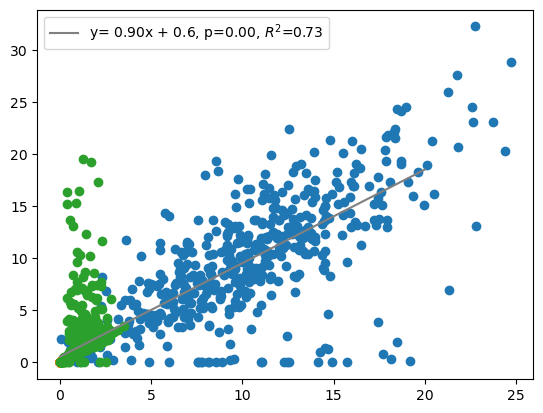

SignificanceResult(statistic=0.9104977429718429, pvalue=0.0)
fast fD difference = -0.42955 ± 4.18254, 22.15122%, 51.04302%
med fD difference = 0.00000 ± 0.00000, nan%, nan%
slow fD difference = 0.94593 ± 2.62214, 10.57143%, 115.43468%
All fD difference = 0.17213 ± 2.90744, 17.06485%, 83.23885%


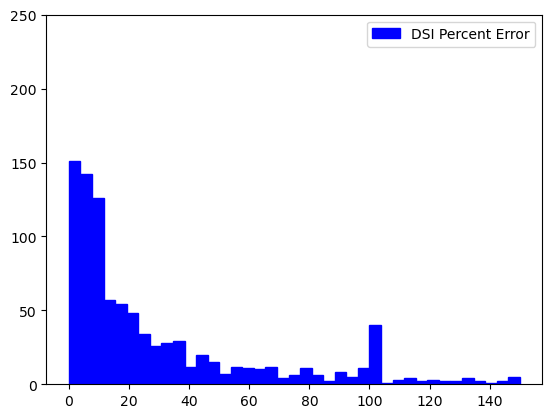

number of peaks = 1.92200 ±  0.36867
2    477
0     16
1      7
Name: Fit number of peaks, dtype: int64
unsorted:
2                  250
3                  227
0                   16
1                    7
number of peaks      1
Name: number of peaks, dtype: int64


In [54]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth = Truth.fillna(0)
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})


## this is with every single one fit individually with a different lambda
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_lambdas.xlsx'
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_CV_sorted') 
AveragedDataFits=AveragedDataFits.rename(columns={c: 'Fit '+c for c in AveragedDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, AveragedDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData = df_AveragedData.fillna(0)

pl.scatter(df_AveragedData['true fast fraction'],df_AveragedData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true med fraction'],df_AveragedData['Fit med fraction'], label = 'med fraction')

pl.scatter(df_AveragedData['true slow fraction'],df_AveragedData['Fit slow fraction'], label = 'slow fraction')
pl.xlim(0,1)
pl.ylim(0,1)


AllTruef = np.array(list(df_AveragedData['true fast fraction'])+list(df_AveragedData['true med fraction'])+list(df_AveragedData['true slow fraction']))
allFitf = np.array(list(df_AveragedData['Fit fast fraction'])+list(df_AveragedData['Fit med fraction'])+list(df_AveragedData['Fit slow fraction']))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruef,allFitf)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()

pl.scatter(df_AveragedData['true fast diffusion'],df_AveragedData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true med diffusion'],df_AveragedData['Fit med diffusion']/1000, label = 'med diffusion')

pl.scatter(df_AveragedData['true slow diffusion'],df_AveragedData['Fit slow diffusion']/1000, label = 'slow diffusion')
pl.xlim(0,.2)
pl.ylim(0,.2)

AllTrueD = np.array(list(df_AveragedData['true fast diffusion'])+list(df_AveragedData['true med diffusion'])+list(df_AveragedData['true slow diffusion']))
allFitD = np.array(list(df_AveragedData['Fit fast diffusion'])+list(df_AveragedData['Fit med diffusion'])+list(df_AveragedData['Fit slow diffusion']))/1000

x = np.linspace(0,.2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrueD,allFitD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
pl.show()

TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.2f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))

print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.nanmedian(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%, {100*np.mean(np.abs((FitfastfDs - TruefastfDs)/TruefastfDs)):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.nanmedian(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%, {100*np.nanmean(np.abs((FitmedfDs - TruemedfDs)/TruemedfDs)):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.nanmedian(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%, {100*np.nanmean(np.abs((FitslowfDs - TrueslowfDs)/TrueslowfDs)):.5f}%')
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.nanmedian(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%, {100*np.nanmean(np.abs((allFitfD - AllTruefD)/AllTruefD)):.5f}%')

pl.hist(100*np.abs((allFitfD - AllTruefD))/AllTruefD,bins = np.linspace(0,150,40),facecolor='blue',edgecolor='blue', label = 'DSI Percent Error')
pl.ylim(0,250)
pl.legend()
pl.show()



print(f'number of peaks = {np.mean(df_AveragedData["Fit number of peaks"]):.5f} ±  {np.std(df_AveragedData["Fit number of peaks"]):.5f}')
print(df_AveragedData['Fit number of peaks'].value_counts())

print('unsorted:')
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'two_peak_lambda_CV') 
print(AveragedDataFits['number of peaks'].value_counts())
